In [10]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# load the model
model = VGG16()
# load an image from file
image1 = load_img('1.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image2 = img_to_array(image1)
# reshape data for the model
image3 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
# prepare the image for the VGG model
image4 = preprocess_input(image3)
# predict the probability across all output classes
yhat = model.predict(image4)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

English_foxhound (70.54%)


# Weights Plotting

In [11]:
weight=[0]*23
for index,layer in enumerate(model.layers):
    weight[index]=layer.get_weights()


### Note: I have considered 5 layers as the first 5 convolution layers of vgg16. 

In [24]:
weight_1=list(weight[1][0].flatten())+list(weight[1][1].flatten()) # layer1   block1_conv1
weight_2=list(weight[2][0].flatten())+list(weight[2][1].flatten()) # layer2   block1_conv2
weight_3=list(weight[4][0].flatten())+list(weight[4][1].flatten()) # layer3   block2_conv1
weight_4=list(weight[5][0].flatten())+list(weight[5][1].flatten()) # layer4   block2_conv2
weight_5=list(weight[7][0].flatten())+list(weight[7][1].flatten()) # layer5   block3_conv1

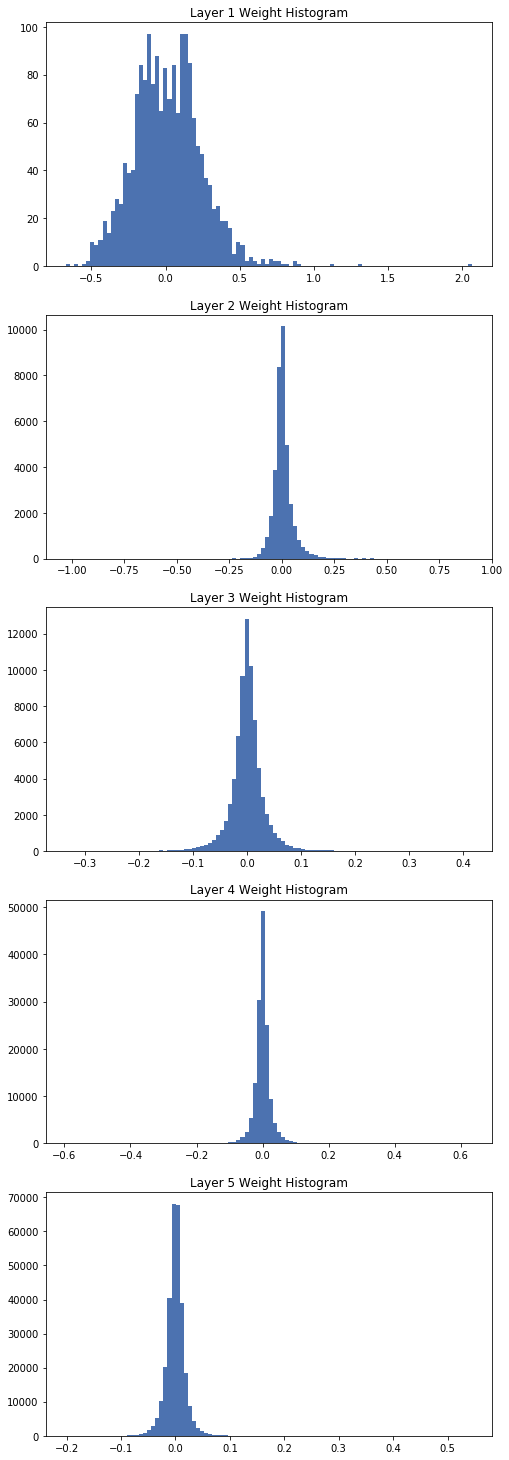

In [63]:
# bins = np.linspace(-2,2, 100)
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 26))
plt.style.use('seaborn-deep')
# plt.hist(weight_1)
# plt.figsize(20,20)
import matplotlib.pyplot as plt
plt.subplot(5, 1, 1)
plt.hist(weight_1,bins=100)
plt.title('Layer 1 Weight Histogram')

plt.subplot(5, 1, 2)
plt.hist(weight_2,bins=100)
plt.title('Layer 2 Weight Histogram')

plt.subplot(5, 1, 3)
plt.hist(weight_3,bins=100)
plt.title('Layer 3 Weight Histogram')

plt.subplot(5, 1, 4)
plt.hist(weight_4,bins=100)
plt.title('Layer 4 Weight Histogram')

plt.subplot(5, 1, 5)
plt.hist(weight_5,bins=100)
plt.title('Layer 5 Weight Histogram')

plt.show()

# Output Plotting of first 5 layers

In [43]:
vgg_layers = [ layer.name for layer in model.layers]
print(vgg_layers)
len(vgg_layers)

['input_3', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions']


23

In [59]:
from keras.models import Model
layer1_extractor = Model(inputs=model.input, outputs=model.get_layer('block1_conv1').output)
layer1_featres = layer1_extractor.predict(image4)

layer2_extractor = Model(inputs=model.input, outputs=model.get_layer('block1_conv2').output)
layer2_featres = layer2_extractor.predict(image4)

layer3_extractor = Model(inputs=model.input, outputs=model.get_layer('block2_conv1').output)
layer3_featres = layer3_extractor.predict(image4)

layer4_extractor = Model(inputs=model.input, outputs=model.get_layer('block2_conv2').output)
layer4_featres = layer4_extractor.predict(image4)

layer5_extractor = Model(inputs=model.input, outputs=model.get_layer('block3_conv1').output)
layer5_featres = layer5_extractor.predict(image4)


545.17413
2255.2034
3572.5889
5584.258
7665.3066


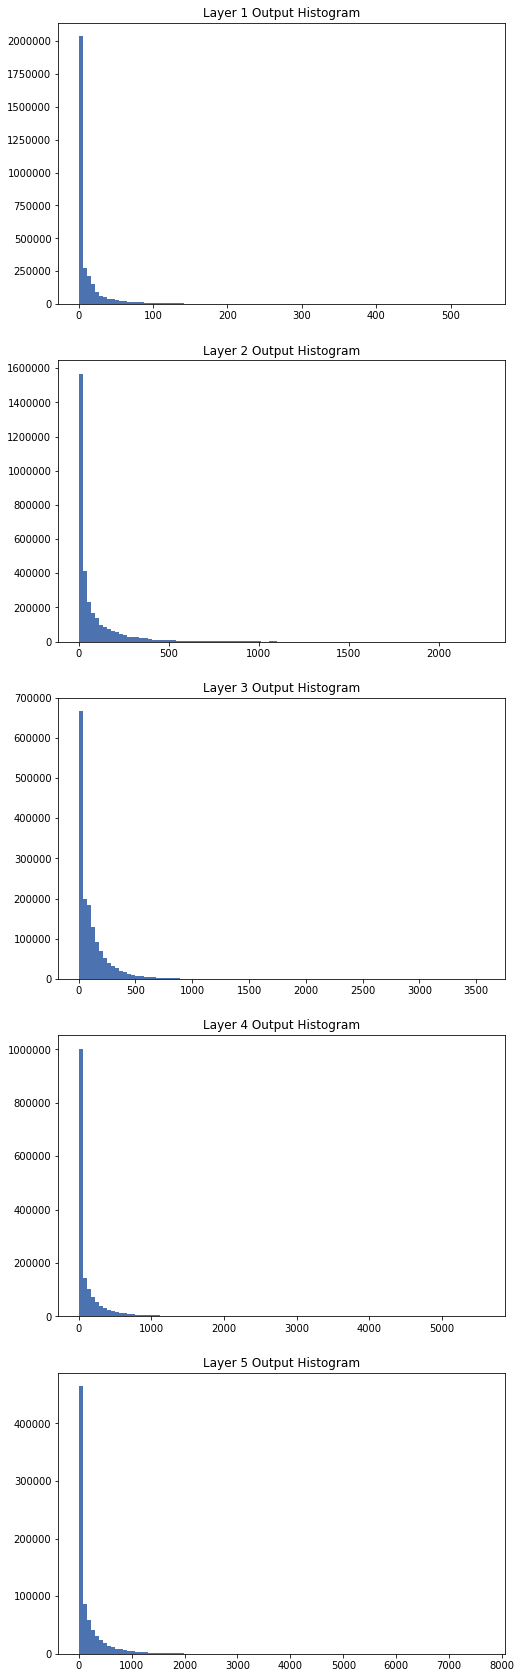

In [60]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None, figsize=(8, 30))
plt.style.use('seaborn-deep')
plt.subplot(5, 1, 1)
plt.hist(layer1_featres.flatten(),bins=100)
plt.title('Layer 1 Output Histogram')

plt.subplot(5, 1, 2)
plt.hist(layer2_featres.flatten(),bins=100)
plt.title('Layer 2 Output Histogram')

plt.subplot(5, 1, 3)
plt.hist(layer3_featres.flatten(),bins=100)
plt.title('Layer 3 Output Histogram')

plt.subplot(5, 1, 4)
plt.hist(layer4_featres.flatten(),bins=100)
plt.title('Layer 4 Output Histogram')

plt.subplot(5, 1, 5)
plt.hist(layer5_featres.flatten(),bins=100)
plt.title('Layer 5 Output Histogram')

plt.show()